In [77]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

import time
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def save(name, data):
    print "save", name, ":", data
    with open(name, 'w') as f:
        f.write(data)
    
def data_target(csv):
    return csv.ix[:, 1:], csv.ix[:, 0]

RND = 241

In [34]:
data = pd.read_csv('gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X, y = data_target(data)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=RND)

In [37]:
GB = {}
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    gbc = GradientBoostingClassifier(n_estimators=250, learning_rate=lr, verbose=False, random_state=RND)
    gbc.fit(X_train, y_train)
    GB[lr] = gbc

In [121]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def getLL(clf, X, y):
    return [log_loss(y, sigmoid(y_pred)) for i, y_pred in enumerate(clf.staged_decision_function(X))]

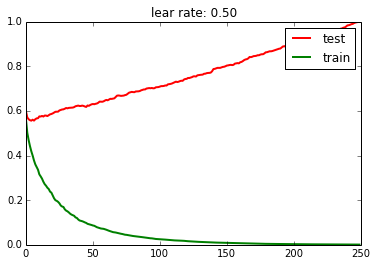

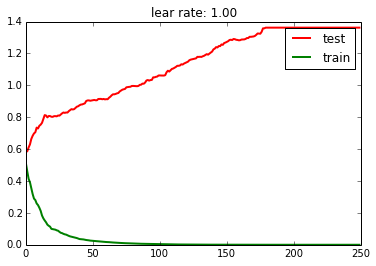

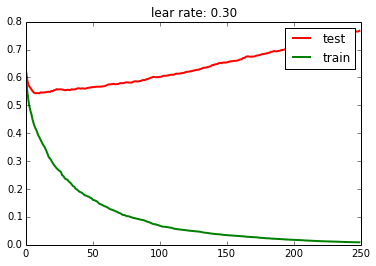

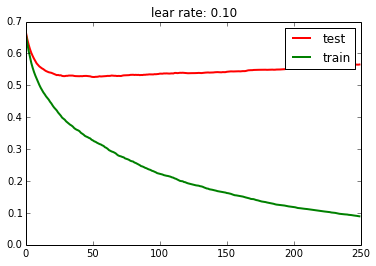

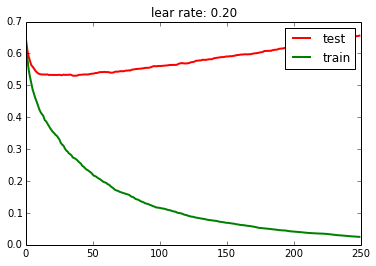

In [122]:
for lr, gb in GB.iteritems():
    test_loss = getLL(gb, X_test, y_test)
    train_loss = getLL(gb, X_train, y_train)

    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title("learn rate: %.2f" % lr)

In [102]:
save('5_3', 'overfitting')

save 5_3 : overfitting


In [124]:
ll = getLL(GB[0.2], X_test, y_test)
min_pos = 0
min_val = 6666
i = 0
for l in ll:
    if l < min_val:
        min_val = l
        min_pos = i
    i += 1
print min_pos, min_val, np.min(ll)
save('5_4', "%.2f %i" % (min_val, min_pos))
    

36 0.530128604869 0.530128604869
save 5_4 : 0.53 36


In [111]:
forest = RandomForestClassifier(n_estimators=min_pos, random_state=RND)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [114]:
pred = forest.predict_proba(X_test)
save('5_5', "%.2f" % log_loss(y_test, pred))

save 5_5 : 0.54
